In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
drug=pd.read_csv(mouse_drug_data_to_load)
clinical=pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
data=pd.merge(drug,clinical,how="outer",on="Mouse ID")

# Display the data table for preview
data.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [61]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_mean=data.groupby(["Drug","Timepoint"]).mean()['Tumor Volume (mm3)']
# Convert to DataFrame
tumor_mean=pd.DataFrame(tumor_mean)
tumor_mean=tumor_mean.reset_index()
# Preview DataFrame
tumor_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [57]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_sem=data.groupby(["Drug","Timepoint"]).sem()['Tumor Volume (mm3)']

# Convert to DataFrame
tumor_sem=pd.DataFrame(tumor_sem)
tumor_sem=tumor_sem.reset_index()

# Preview DataFrame
tumor_sem.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [64]:
# Minor Data Munging to Re-Format the Data Frames
tumor_mean=tumor_mean.reset_index()
tumor_mean_pivot=tumor_mean.pivot(index="Timepoint",columns="Drug")['Tumor Volume (mm3)']
# Preview that Reformatting worked
tumor_mean_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
tumor_sem=tumor_sem.reset_index()
tumor_sem_pivot=tumor_sem.pivot(index="Timepoint",columns="Drug")['Tumor Volume (mm3)']

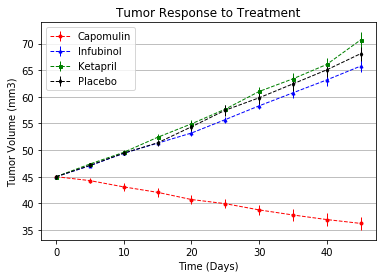

In [72]:
# Generate the Plot (with Error Bars)
x_axis=tumor_mean_pivot.index
plt.errorbar(x_axis, tumor_mean_pivot["Capomulin"], yerr=tumor_sem_pivot["Capomulin"], color="red", marker="o",markersize=3,linestyle="dashed",linewidth=1)
plt.errorbar(x_axis, tumor_mean_pivot["Infubinol"], yerr=tumor_sem_pivot["Infubinol"], color="blue", marker="^", markersize=3, linestyle="dashed", linewidth=1)
plt.errorbar(x_axis, tumor_mean_pivot["Ketapril"], yerr=tumor_sem_pivot["Ketapril"], color="green", marker="s", markersize=3, linestyle="dashed", linewidth=1)
plt.errorbar(x_axis, tumor_mean_pivot["Placebo"], yerr=tumor_sem_pivot["Placebo"], color="black", marker="d", markersize=3, linestyle="dashed", linewidth=1)

plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(axis='y')
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'],loc="best")
# Save the Figure
plt.savefig("result/1.png")
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_site_mean=data.groupby(["Drug","Timepoint"]).mean()['Metastatic Sites']

# Convert to DataFrame
met_site_mean=pd.DataFrame(met_site_mean)
# Preview DataFrame
met_site_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_site_sem=data.groupby(["Drug","Timepoint"]).sem()['Metastatic Sites']
# Convert to DataFrame
met_site_sem=pd.DataFrame(met_site_sem)
# Preview DataFrame
met_site_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames
met_site_mean=met_site_mean.reset_index()
met_site_mean_pivot=met_site_mean.pivot(index="Timepoint",columns="Drug")['Metastatic Sites']
# Preview that Reformatting worked
met_site_mean_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [10]:
met_site_sem=met_site_sem.reset_index()
met_site_sem_pivot=met_site_sem.pivot(index="Timepoint",columns="Drug")['Metastatic Sites']

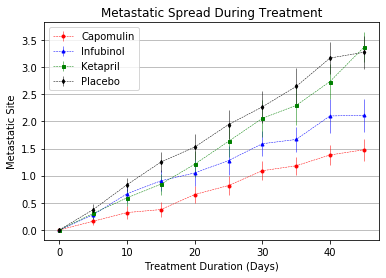

In [73]:
# Generate the Plot (with Error Bars)
x_axis=met_site_mean_pivot.index
plt.errorbar(x_axis, met_site_mean_pivot["Capomulin"], yerr=met_site_sem_pivot["Capomulin"], color="red", marker="o", markersize=3, linestyle="dashed", linewidth=0.5)
plt.errorbar(x_axis, met_site_mean_pivot["Infubinol"], yerr=met_site_sem_pivot["Infubinol"], color="blue", marker="^", markersize=3, linestyle="dashed", linewidth=0.5)
plt.errorbar(x_axis, met_site_mean_pivot["Ketapril"], yerr=met_site_sem_pivot["Ketapril"], color="green", marker="s", markersize=3, linestyle="dashed", linewidth=0.5)
plt.errorbar(x_axis, met_site_mean_pivot["Placebo"], yerr=met_site_sem_pivot["Placebo"], color="black", marker="d", markersize=3, linestyle="dashed", linewidth=0.5)

plt.title("Metastatic Spread During Treatment")
plt.ylabel("Metastatic Site")
plt.xlabel("Treatment Duration (Days)")
plt.grid(axis='y')
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'],loc="best")
# Save the Figure
plt.savefig("result/2.png")
# Show the Figure
plt.show()

## Survival Rates

In [26]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count=data.groupby(["Drug","Timepoint"]).count()['Tumor Volume (mm3)']
# Convert to DataFrame
mouse_count=pd.DataFrame(mouse_count)
mouse_count=mouse_count.rename(columns={'Tumor Volume (mm3)':"Count"})
mouse_count=mouse_count.reset_index()
# Preview DataFrame
mouse_count.head()

,Drug,Timepoint,Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [27]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count=mouse_count.reset_index()
mouse_count_pivot=mouse_count.pivot(index="Timepoint",columns="Drug")['Count']

# Preview the Data Frame
mouse_count_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [28]:
survival_rate_cap=mouse_count_pivot["Capomulin"]/25*100
survival_rate_inf=mouse_count_pivot["Infubinol"]/25*100
survival_rate_ket=mouse_count_pivot["Ketapril"]/25*100
survival_rate_pla=mouse_count_pivot["Placebo"]/25*100

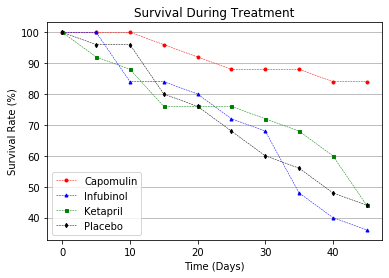

In [74]:
# Generate the Plot (Accounting for percentages)
x_axis=mouse_count_pivot.index
plt.errorbar(x_axis, survival_rate_cap, color="red", marker="o", markersize=3, linestyle="dashed", linewidth=0.5)
plt.errorbar(x_axis, survival_rate_inf, color="blue", marker="^", markersize=3, linestyle="dashed", linewidth=0.5)
plt.errorbar(x_axis, survival_rate_ket, color="green", marker="s", markersize=3, linestyle="dashed", linewidth=0.5)
plt.errorbar(x_axis, survival_rate_pla, color="black", marker="d", markersize=3, linestyle="dashed", linewidth=0.5)

plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.grid(axis='y')
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'],loc="best")
# Save the Figure
plt.savefig("result/3.png")
# Show the Figure
plt.show()


## Summary Bar Graph

In [34]:
# Calculate the percent changes for each drug
change_percent=(tumor_mean_pivot.iloc[-1,:]-tumor_mean_pivot.iloc[0,:])/tumor_mean_pivot.iloc[0,:]*100
# Display the data to confirm
change_percent

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [35]:
# Store all Relevant Percent Changes into a Tuple
percent = (change_percent["Capomulin"], 
               change_percent["Infubinol"], 
               change_percent["Ketapril"], 
               change_percent["Placebo"])
percent

(-19.475302667894173, 46.12347172785187, 57.028794686606076, 51.29796048315153)

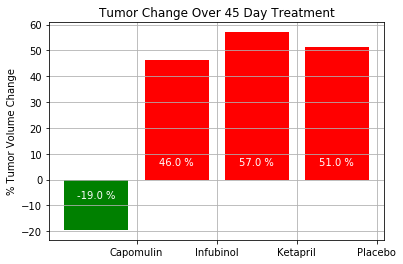

In [80]:
# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
x_index = np.arange(len(percent))  
drug_pass = ax.bar(x_index[0], percent[0],color='green')
drug_fail = ax.bar(x_index[1:], percent[1:], color='red')

# Orient widths. Add labels, tick marks, etc. 
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_ylabel('% Tumor Volume Change')
ax.set_xticks(x_index+0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.grid(True)
# Use functions to label the percentages of changes
def label(drugs):
    for drug in drugs:
        height = drug.get_height()
        xloc=drug.get_x() + drug.get_width() / 2
        label=(f'{round(height,0)} %')
        if height>0:
            yloc=5
        else:
            yloc=-8
        ax.text(xloc,yloc,label,
                ha='center', va='bottom',color="white")

# Call functions to implement the function calls
label(drug_fail)
label(drug_pass)

# Save the Figure
fig.savefig("result/4.png")

# Show the Figure
fig.show()

Observation

- Capomulin is the only drug that reduced tumor volumn over time. It reduced the tumor volumn by 19% while tumor volumn all increased by roughly 50% for the other three drugs.
- Metastatic spread is the slowest with Capomulin (around 1.5), and spreads the second slowest with Infubinol (around 2). Ketapril and Placebo exhibited similiar metastatic spread, which is the highest (around 3.25).
- All four drugs showed a declining trend of survival rate as time goes by. Capomulin controlled the survival rate to be above 80% after 45 days, while the survival rates for the rest three drugs all dropped below 50% after 45 days.